# Sales Forecasting and Analysis Project

In [1]:
pip install pandas openpyxl

Note: you may need to restart the kernel to use updated packages.


# Load the File

In [11]:
import pandas as pd

# Specify the full path to your text file
file_path = r'C:\Users\manu0\Desktop\superstore_final_dataset (1).csv' # Update with the actual path

# Load the text file with specified encoding
data = pd.read_csv(file_path, encoding='ISO-8859-1')

# Display the first few rows
print(data.head())


   Row_ID        Order_ID  Order_Date   Ship_Date       Ship_Mode Customer_ID  \
0       1  CA-2017-152156   8/11/2017  11/11/2017    Second Class    CG-12520   
1       2  CA-2017-152156   8/11/2017  11/11/2017    Second Class    CG-12520   
2       3  CA-2017-138688   12/6/2017  16/06/2017    Second Class    DV-13045   
3       4  US-2016-108966  11/10/2016  18/10/2016  Standard Class    SO-20335   
4       5  US-2016-108966  11/10/2016  18/10/2016  Standard Class    SO-20335   

     Customer_Name    Segment        Country             City       State  \
0      Claire Gute   Consumer  United States        Henderson    Kentucky   
1      Claire Gute   Consumer  United States        Henderson    Kentucky   
2  Darrin Van Huff  Corporate  United States      Los Angeles  California   
3    Sean O Donnel   Consumer  United States  Fort Lauderdale     Florida   
4    Sean O Donnel   Consumer  United States  Fort Lauderdale     Florida   

   Postal_Code Region       Product_ID         Cat

# Data Exploration

In [13]:
import pandas as pd

# Display basic information about the dataset
print(data.info())

# Display summary statistics
print(data.describe())

# Check for missing values
print(data.isnull().sum())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9800 entries, 0 to 9799
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row_ID         9800 non-null   int64  
 1   Order_ID       9800 non-null   object 
 2   Order_Date     9800 non-null   object 
 3   Ship_Date      9800 non-null   object 
 4   Ship_Mode      9800 non-null   object 
 5   Customer_ID    9800 non-null   object 
 6   Customer_Name  9800 non-null   object 
 7   Segment        9800 non-null   object 
 8   Country        9800 non-null   object 
 9   City           9800 non-null   object 
 10  State          9800 non-null   object 
 11  Postal_Code    9789 non-null   float64
 12  Region         9800 non-null   object 
 13  Product_ID     9800 non-null   object 
 14  Category       9800 non-null   object 
 15  Sub_Category   9800 non-null   object 
 16  Product_Name   9800 non-null   object 
 17  Sales          9800 non-null   float64
dtypes: float

# Data Preprocessing

In [17]:
import pandas as pd

# Convert Order_Date and Ship_Date to datetime format with dayfirst parameter
data['Order_Date'] = pd.to_datetime(data['Order_Date'], dayfirst=True)
data['Ship_Date'] = pd.to_datetime(data['Ship_Date'], dayfirst=True)

# Check the first few rows to verify the date conversion
print(data.head())


   Row_ID        Order_ID Order_Date  Ship_Date       Ship_Mode Customer_ID  \
0       1  CA-2017-152156 2017-11-08 2017-11-11    Second Class    CG-12520   
1       2  CA-2017-152156 2017-11-08 2017-11-11    Second Class    CG-12520   
2       3  CA-2017-138688 2017-06-12 2017-06-16    Second Class    DV-13045   
3       4  US-2016-108966 2016-10-11 2016-10-18  Standard Class    SO-20335   
4       5  US-2016-108966 2016-10-11 2016-10-18  Standard Class    SO-20335   

     Customer_Name    Segment        Country             City       State  \
0      Claire Gute   Consumer  United States        Henderson    Kentucky   
1      Claire Gute   Consumer  United States        Henderson    Kentucky   
2  Darrin Van Huff  Corporate  United States      Los Angeles  California   
3    Sean O Donnel   Consumer  United States  Fort Lauderdale     Florida   
4    Sean O Donnel   Consumer  United States  Fort Lauderdale     Florida   

   Postal_Code Region       Product_ID         Category Sub_Ca

# Data Vizualization

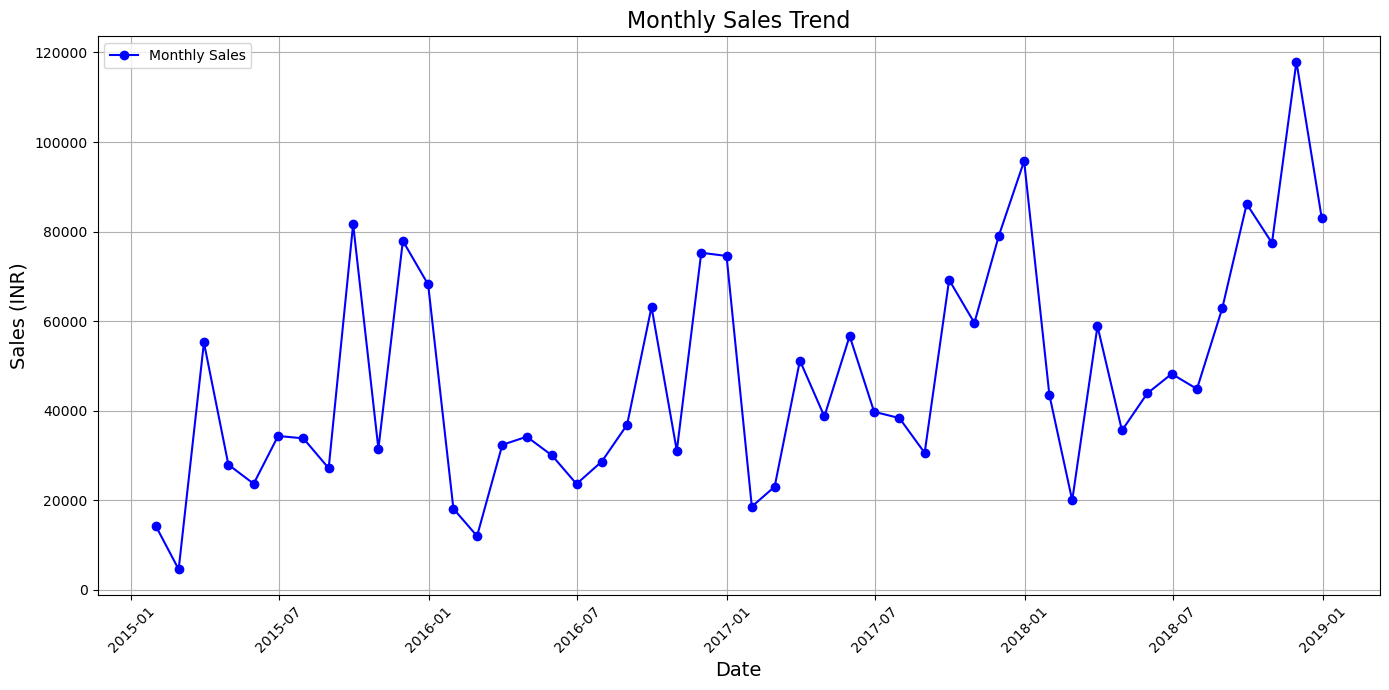

In [21]:
import pandas as pd
import matplotlib.pyplot as plt

# Aggregate monthly sales
data['Order_Date'] = pd.to_datetime(data['Order_Date'], dayfirst=True)
monthly_sales = data.resample('M', on='Order_Date')['Sales'].sum()

# Plot the monthly sales trend
plt.figure(figsize=(14, 7))
plt.plot(monthly_sales.index, monthly_sales.values, marker='o', linestyle='-', color='b', label='Monthly Sales')
plt.title('Monthly Sales Trend', fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Sales (INR)', fontsize=14)
plt.grid(True)
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


# Split Data into Training and Testing Sets

In [29]:
from sklearn.model_selection import train_test_split

# Create features and target
X = monthly_sales.index.values.reshape(-1, 1)
y = monthly_sales.values

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)


# Choose and Train Ensemble Models

In [31]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
import numpy as np

# Initialize the models
model_lr = LinearRegression()
model_dt = DecisionTreeRegressor()
model_rf = RandomForestRegressor(n_estimators=100)

# Train the models
model_lr.fit(X_train, y_train)
model_dt.fit(X_train, y_train)
model_rf.fit(X_train, y_train)


RandomForestRegressor()

# Evaluate the model

In [35]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Create features and target
X = np.arange(len(monthly_sales)).reshape(-1, 1)
y = monthly_sales.values

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Initialize the model
model_rf = RandomForestRegressor(n_estimators=100, random_state=42)

# Fit the model on the training data
model_rf.fit(X_train, y_train)

# Predict on the test data
y_pred_rf = model_rf.predict(X_test)

# Evaluate the model
mae_rf = mean_absolute_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))

print(f'RandomForest MAE: {mae_rf}')
print(f'RandomForest RMSE: {rmse_rf}')


RandomForest MAE: 34702.46330199995
RandomForest RMSE: 42205.55893084737


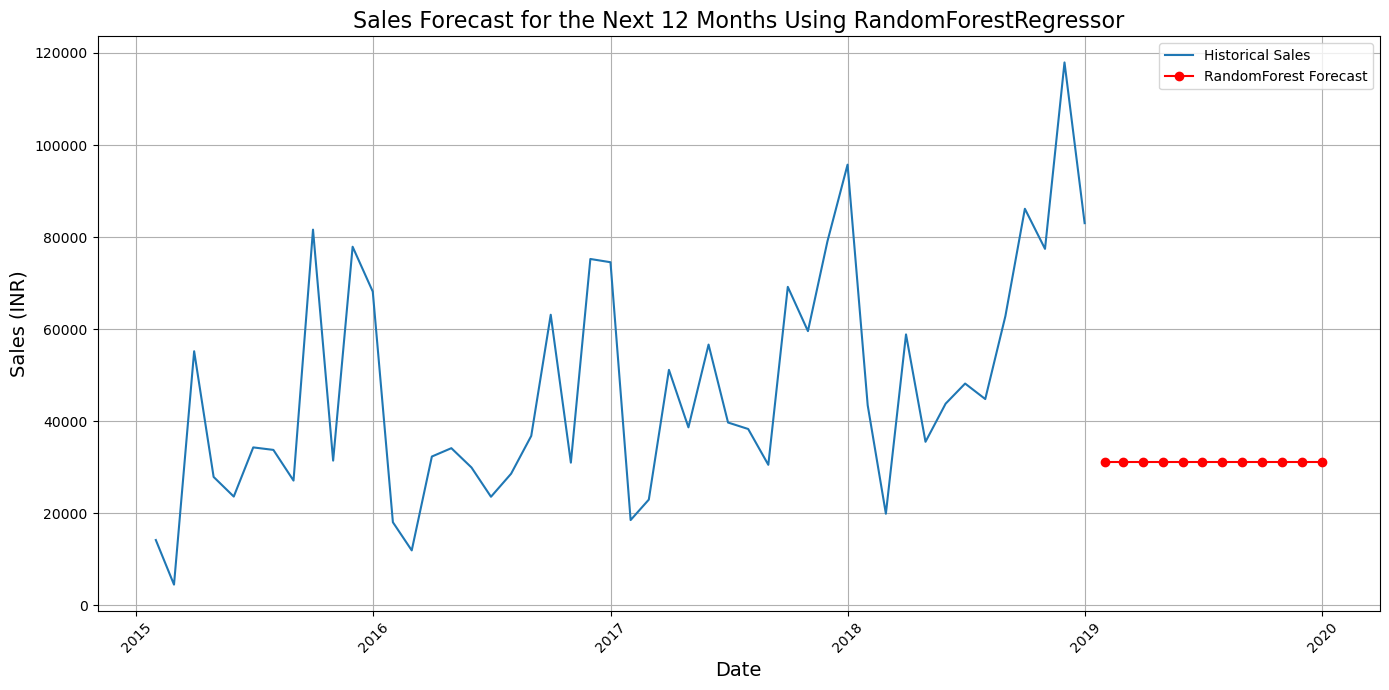

In [37]:
# Generate future dates for forecasting
future_dates = pd.date_range(start=monthly_sales.index[-1], periods=13, freq='M')[1:]
future_X = np.arange(len(monthly_sales), len(monthly_sales) + 12).reshape(-1, 1)

# Forecast future sales using the RandomForestRegressor
future_pred_rf = model_rf.predict(future_X)

# Plot the forecast
plt.figure(figsize=(14, 7))
plt.plot(monthly_sales.index, monthly_sales.values, label='Historical Sales')
plt.plot(future_dates, future_pred_rf, label='RandomForest Forecast', color='red', marker='o', linestyle='-')
plt.title('Sales Forecast for the Next 12 Months Using RandomForestRegressor', fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Sales (INR)', fontsize=14)
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


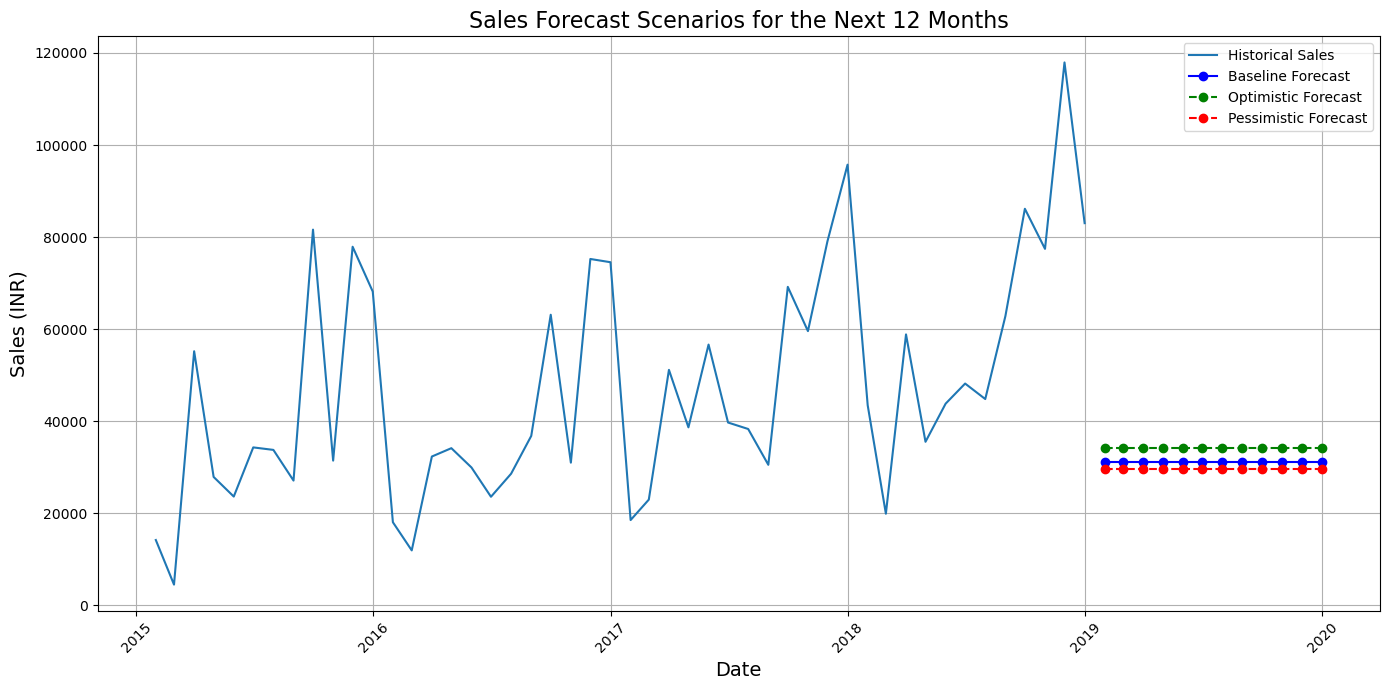

In [43]:
# Optimistic Scenario: Assume a 10% increase in forecasted sales
optimistic_forecast = future_pred_rf * 1.10

# Pessimistic Scenario: Assume a 5% decrease in forecasted sales
pessimistic_forecast = future_pred_rf * 0.95

# Plot the scenarios
plt.figure(figsize=(14, 7))
plt.plot(monthly_sales.index, monthly_sales.values, label='Historical Sales')
plt.plot(future_dates, future_pred_rf, label='Baseline Forecast', color='blue', marker='o', linestyle='-')
plt.plot(future_dates, optimistic_forecast, label='Optimistic Forecast', color='green', marker='o', linestyle='--')
plt.plot(future_dates, pessimistic_forecast, label='Pessimistic Forecast', color='red', marker='o', linestyle='--')
plt.title('Sales Forecast Scenarios for the Next 12 Months', fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Sales (INR)', fontsize=14)
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [45]:
# Print the forecasted values
print("Baseline Forecast:", future_pred_rf)
print("Optimistic Forecast:", optimistic_forecast)
print("Pessimistic Forecast:", pessimistic_forecast)


Baseline Forecast: [31162.991478 31162.991478 31162.991478 31162.991478 31162.991478
 31162.991478 31162.991478 31162.991478 31162.991478 31162.991478
 31162.991478 31162.991478]
Optimistic Forecast: [34279.2906258 34279.2906258 34279.2906258 34279.2906258 34279.2906258
 34279.2906258 34279.2906258 34279.2906258 34279.2906258 34279.2906258
 34279.2906258 34279.2906258]
Pessimistic Forecast: [29604.8419041 29604.8419041 29604.8419041 29604.8419041 29604.8419041
 29604.8419041 29604.8419041 29604.8419041 29604.8419041 29604.8419041
 29604.8419041 29604.8419041]


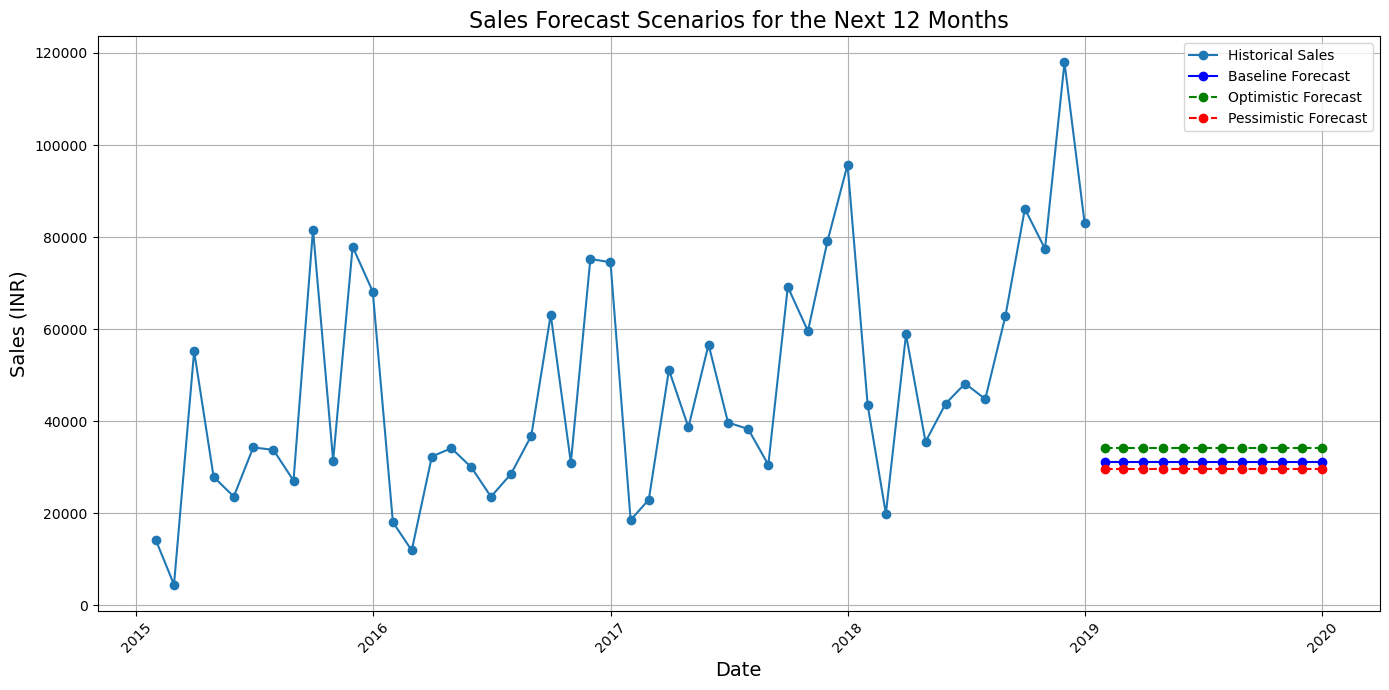

In [47]:
import matplotlib.pyplot as plt

# Plot the historical sales
plt.figure(figsize=(14, 7))
plt.plot(monthly_sales.index, monthly_sales.values, label='Historical Sales', marker='o', linestyle='-')

# Plot the baseline forecast
plt.plot(future_dates, future_pred_rf, label='Baseline Forecast', color='blue', marker='o', linestyle='-')

# Plot the optimistic forecast
plt.plot(future_dates, optimistic_forecast, label='Optimistic Forecast', color='green', marker='o', linestyle='--')

# Plot the pessimistic forecast
plt.plot(future_dates, pessimistic_forecast, label='Pessimistic Forecast', color='red', marker='o', linestyle='--')

# Add title and labels
plt.title('Sales Forecast Scenarios for the Next 12 Months', fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Sales (INR)', fontsize=14)
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()

# Show the plot
plt.show()


# Evaluating All Models

In [49]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Initialize the models
model_lr = LinearRegression()
model_dt = DecisionTreeRegressor()

# Train the models
model_lr.fit(X_train, y_train)
model_dt.fit(X_train, y_train)

# Predict on the test data
y_pred_lr = model_lr.predict(X_test)
y_pred_dt = model_dt.predict(X_test)
y_pred_rf = model_rf.predict(X_test)

# Calculate performance metrics for each model
mae_lr = mean_absolute_error(y_test, y_pred_lr)
rmse_lr = np.sqrt(mean_squared_error(y_test, y_pred_lr))

mae_dt = mean_absolute_error(y_test, y_pred_dt)
rmse_dt = np.sqrt(mean_squared_error(y_test, y_pred_dt))

mae_rf = mean_absolute_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))

# Print the metrics
print(f'Linear Regression MAE: {mae_lr}, RMSE: {rmse_lr}')
print(f'Decision Tree MAE: {mae_dt}, RMSE: {rmse_dt}')
print(f'RandomForest MAE: {mae_rf}, RMSE: {rmse_rf}')


Linear Regression MAE: 18560.28591345771, RMSE: 23619.289223453263
Decision Tree MAE: 45944.45738000001, RMSE: 51845.36053863657
RandomForest MAE: 34702.46330199995, RMSE: 42205.55893084737


# Forecast Future Sales

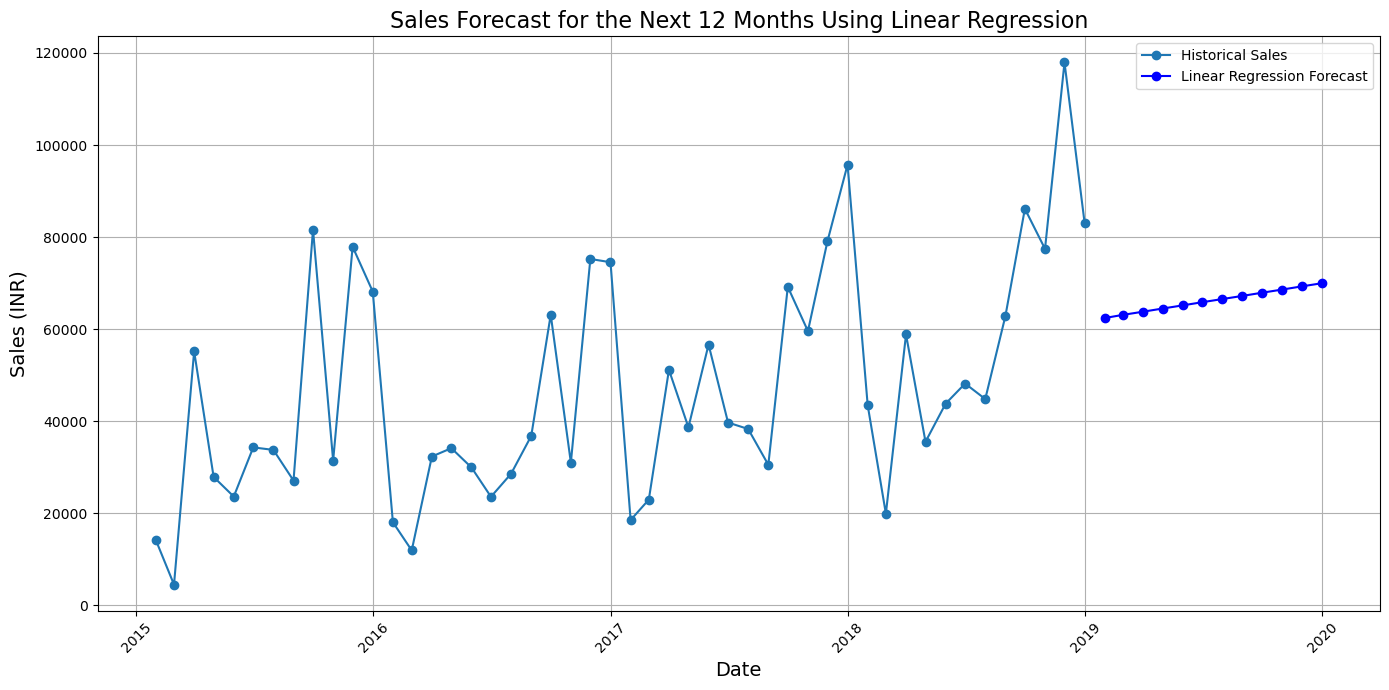

In [51]:
import matplotlib.pyplot as plt
import numpy as np

# Generate future dates for forecasting
future_dates = pd.date_range(start=monthly_sales.index[-1], periods=13, freq='M')[1:]
future_X = np.arange(len(monthly_sales), len(monthly_sales) + 12).reshape(-1, 1)

# Forecast future sales using the Linear Regression model
future_pred_lr = model_lr.predict(future_X)

# Plot the forecast
plt.figure(figsize=(14, 7))
plt.plot(monthly_sales.index, monthly_sales.values, label='Historical Sales', marker='o', linestyle='-')
plt.plot(future_dates, future_pred_lr, label='Linear Regression Forecast', color='blue', marker='o', linestyle='-')
plt.title('Sales Forecast for the Next 12 Months Using Linear Regression', fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Sales (INR)', fontsize=14)
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [53]:
# Optimistic Scenario: Assume a 10% increase in forecasted sales
optimistic_forecast = future_pred_lr * 1.10


In [55]:
# Pessimistic Scenario: Assume a 5% decrease in forecasted sales
pessimistic_forecast = future_pred_lr * 0.95


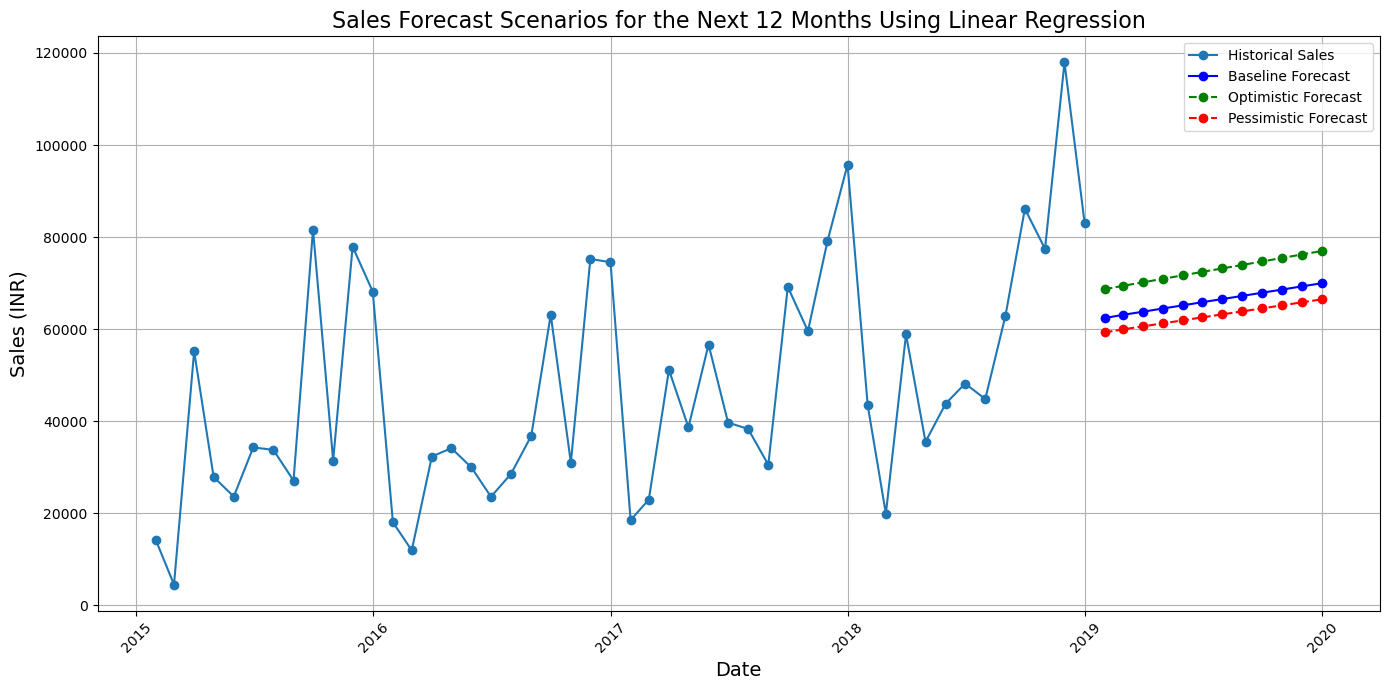

In [57]:
# Plot the scenarios
plt.figure(figsize=(14, 7))
plt.plot(monthly_sales.index, monthly_sales.values, label='Historical Sales', marker='o', linestyle='-')
plt.plot(future_dates, future_pred_lr, label='Baseline Forecast', color='blue', marker='o', linestyle='-')
plt.plot(future_dates, optimistic_forecast, label='Optimistic Forecast', color='green', marker='o', linestyle='--')
plt.plot(future_dates, pessimistic_forecast, label='Pessimistic Forecast', color='red', marker='o', linestyle='--')
plt.title('Sales Forecast Scenarios for the Next 12 Months Using Linear Regression', fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Sales (INR)', fontsize=14)
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
